<a href="https://colab.research.google.com/github/sudeepmathew/Voice-Of-Customer/blob/master/Ngram_Analysis_and_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting Data

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
import pandas as pd
import nltk
from nltk import FreqDist
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
data = pd.read_csv("/gdrive/My Drive/all_file.csv")

In [7]:
data.head()

,Unnamed: 0,Reviews,Topic
0,0,blackwasp thanks automobile encyclopedia sendi...,3
1,1,happening name car day first harrier hector ha...,4
2,2,blackwasp thanks automobile encyclopedia sendi...,1
3,3,quickly googled hector baojun chevy captiva tr...,3
4,4,rovingeye quickly googled hector baojun chevy ...,3


In [16]:
data.shape

(1608, 4)

# Fetch word count for each Review


In [8]:
#Fetch wordcount for each abstract
data['word_count'] = data['Reviews'].apply(lambda x: len(str(x).split(" ")))
data[['Reviews','word_count']].head()

,Reviews,word_count
0,blackwasp thanks automobile encyclopedia sendi...,19
1,happening name car day first harrier hector ha...,32
2,blackwasp thanks automobile encyclopedia sendi...,64
3,quickly googled hector baojun chevy captiva tr...,11
4,rovingeye quickly googled hector baojun chevy ...,33


In [9]:
##Descriptive statistics of word counts
data.word_count.describe()

count    1608.000000
mean       62.868159
std        73.677800
min         1.000000
25%        25.000000
50%        44.000000
75%        76.000000
max      1235.000000
Name: word_count, dtype: float64

# Most common and uncommon words

In [10]:
#Identify common words
freq = pd.Series(' '.join(data['Reviews']).split()).value_counts()[:20]
freq

hector     1406
mg         1301
like        632
diesel      583
petrol      526
even        491
drive       476
vehicle     463
car         459
time        455
well        447
booking     444
seltos      433
get         427
good        420
kmpl        419
harrier     403
people      377
dct         377
much        372
dtype: int64

In [11]:
#Identify uncommon words
freq1 =  pd.Series(' '.join(data 
         ['Reviews']).split()).value_counts()[-20:]
freq1


biggish       1
hots          1
advise        1
relation      1
resorting     1
overseas      1
touching      1
starry        1
fitting       1
bt            1
correctly     1
tavera        1
jokingly      1
entrance      1
corrected     1
fir           1
describing    1
belief        1
visual        1
offroader     1
dtype: int64

# Text Pre-processing

####Text pre-processing can be divided into two broad categories — noise removal & normalization. Data components that are redundant to the core text analytics can be considered as noise.


In [12]:
nltk.download('wordnet') 
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()
stem = PorterStemmer()
word = "inversely"
print("stemming:",stem.stem(word))
print("lemmatization:", lem.lemmatize(word, "v"))

# Libraries for text preprocessing
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
stemming: invers
lemmatization: inversely
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Stop Word Removal and adding Custom Stop Word

Stop words include the large number of prepositions, pronouns, conjunctions etc in sentences. These words need to be removed before we analyse the text, so that the frequently used words are mainly the words relevant to the context and not common words used in the text.

In [0]:
##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))
##Creating a list of custom stopwords
new_words = ["using", "show", "result", "large","harrier","mg","hector","car","vehicle","even","seltos",
             "number","like","well","get","see","time","way","people","however","could","much","take","look",
             "good","think","people","kia","test","may","need","td","sure","right","lot","go","come","seem",
             "many","really","still","might","review","know","big","india","drive","got","year","seems","going",
             "booking","issue","say","around","thing","feel","said","pricing","already","make","check","another",
             "first","give","quite","launch","product","long","creta","road","point","wait","auto","since","suv",
             "tata","back","variant","part","compass","bit","case","agree","expect","company","hyundai","hope","available","com",
             "day","sale","option","different","indian","sale","market","option","reason","saw","brand","guess","dealer",
            "segment","figure","especially","question","thought","guy","end","least","used","understand","top end","waiting",
             "seen","close","overall","getting","petrol","diesel","gap","panel","booked","month","done","top","customer","showroom",
             "also", "iv", "one", "two", "new","baojun","ga","slack","country","though", "previously", "shown","quote","originally","posted","post","owner","youtube","www","http"]
stop_words = stop_words.union(new_words)

# Building Cleaned Corpus

In [0]:
corpus = []
for i in range(0, 1608):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', data['Reviews'][i])
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)

In [42]:
#View corpus item
print(corpus[100])

jailbird fynix club fb page sharp lost count similar attachment mod please remove inappropriate actually found person side bonnet open added smoke burning comment found registration person actual confronted acknowledged clicked pic


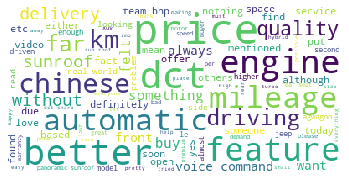

In [43]:
#Word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

# Creating a vector of word counts
As the first step of conversion, we will use the CountVectoriser to tokenise the text and build a vocabulary of known words. We first create a variable “cv” of the CountVectoriser class, and then evoke the fit_transform function to learn and build the vocabulary.

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)

cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))


max_df — When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words). This is to ensure that we only have words relevant to the context and not commonly used words.


max_features — determines the number of columns in the matrix.


n-gram range — we would want to look at a list of single words, two words (bi-grams) and three words (tri-gram) combinations.


An encoded vector is returned with a length of the entire vocabulary.

In [45]:
# Listing a Review in bag of Word
list(cv.vocabulary_.keys())[:10]

['blackwasp',
 'thanks',
 'automobile',
 'sending',
 'image',
 'city',
 'never',
 'chance',
 'click',
 'picture']

# **Visualize top N uni-grams, bi-grams & tri-grams**

[Text(0, 0, 'kmpl'),
 Text(0, 0, 'dct'),
 Text(0, 0, 'price'),
 Text(0, 0, 'engine'),
 Text(0, 0, 'mileage'),
 Text(0, 0, 'better'),
 Text(0, 0, 'feature'),
 Text(0, 0, 'km'),
 Text(0, 0, 'city'),
 Text(0, 0, 'quality'),
 Text(0, 0, 'delivery'),
 Text(0, 0, 'chinese'),
 Text(0, 0, 'sunroof'),
 Text(0, 0, 'traffic'),
 Text(0, 0, 'driving'),
 Text(0, 0, 'seat'),
 Text(0, 0, 'experience'),
 Text(0, 0, 'automatic'),
 Text(0, 0, 'size'),
 Text(0, 0, 'buy')]

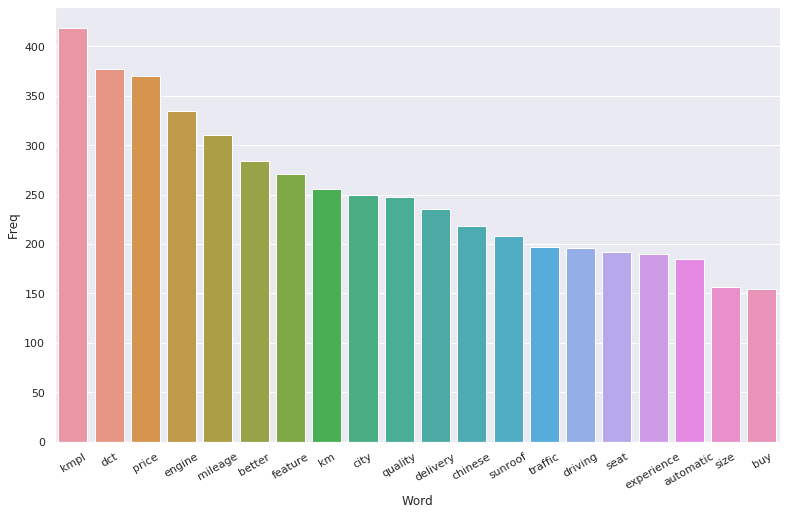

In [46]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]
#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

              Bi-gram  Freq
0       voice command    66
1            team bhp    64
2          real world    55
3   panoramic sunroof    49
4           rear seat    46
5           dct sharp    45
6            sun roof    44
7     fuel efficiency    41
8           kmpl city    41
9       took delivery    34
10        return kmpl    33
11      edit launched    32
12         fit finish    31
13       touch screen    31
14         named edit    31
15      build quality    30
16       crazy driver    29
17       city traffic    28
18    internet inside    28
19    looking forward    28


[Text(0, 0, 'voice command'),
 Text(0, 0, 'team bhp'),
 Text(0, 0, 'real world'),
 Text(0, 0, 'panoramic sunroof'),
 Text(0, 0, 'rear seat'),
 Text(0, 0, 'dct sharp'),
 Text(0, 0, 'sun roof'),
 Text(0, 0, 'fuel efficiency'),
 Text(0, 0, 'kmpl city'),
 Text(0, 0, 'took delivery'),
 Text(0, 0, 'return kmpl'),
 Text(0, 0, 'edit launched'),
 Text(0, 0, 'fit finish'),
 Text(0, 0, 'touch screen'),
 Text(0, 0, 'named edit'),
 Text(0, 0, 'build quality'),
 Text(0, 0, 'crazy driver'),
 Text(0, 0, 'city traffic'),
 Text(0, 0, 'internet inside'),
 Text(0, 0, 'looking forward')]

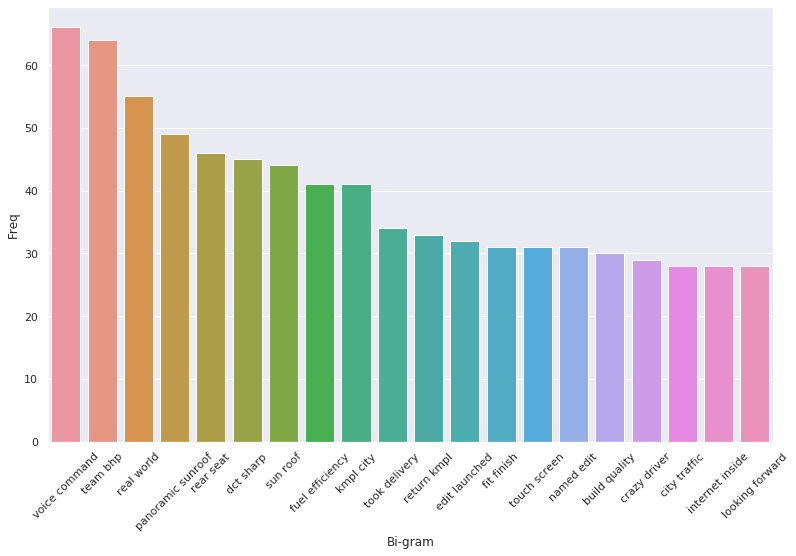

In [47]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)
#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

                      Tri-gram  Freq
0          named edit launched    31
1           rain sensing wiper    19
2             thread non blown    18
3     frustrated fe delivering    17
4           fe delivering kmpl    17
5           delivering kmpl sa    17
6            kmpl sa convinced    17
7            sa convinced kmpl    17
8           apology rant worry    17
9           rant worry willing    17
10           worry willing cut    17
11      willing cut automotive    17
12    cut automotive tradition    17
13  automotive tradition great    17
14           kmpl city highway    15
15          delivery white dct    15
16   senior colleague hospital    14
17     colleague hospital took    14
18      hospital took delivery    14
19           took delivery dct    14


[Text(0, 0, 'named edit launched'),
 Text(0, 0, 'rain sensing wiper'),
 Text(0, 0, 'thread non blown'),
 Text(0, 0, 'frustrated fe delivering'),
 Text(0, 0, 'fe delivering kmpl'),
 Text(0, 0, 'delivering kmpl sa'),
 Text(0, 0, 'kmpl sa convinced'),
 Text(0, 0, 'sa convinced kmpl'),
 Text(0, 0, 'apology rant worry'),
 Text(0, 0, 'rant worry willing'),
 Text(0, 0, 'worry willing cut'),
 Text(0, 0, 'willing cut automotive'),
 Text(0, 0, 'cut automotive tradition'),
 Text(0, 0, 'automotive tradition great'),
 Text(0, 0, 'kmpl city highway'),
 Text(0, 0, 'delivery white dct'),
 Text(0, 0, 'senior colleague hospital'),
 Text(0, 0, 'colleague hospital took'),
 Text(0, 0, 'hospital took delivery'),
 Text(0, 0, 'took delivery dct')]

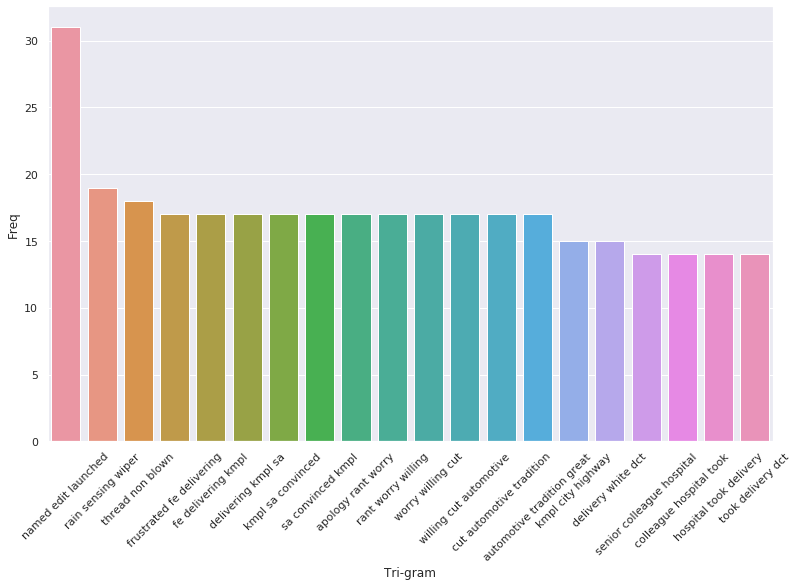

In [48]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top3_words = get_top_n3_words(corpus, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)
#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)